In [2]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive

In [3]:
df = pd.read_csv('/content/drive/MyDrive/IBM Capstone/BMW_Car_Sales_Classification.csv')
df.head(20)

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low
5,5 Series,2017,Middle East,Silver,Diesel,Manual,1.9,171362,42926,1232,Low
6,i8,2022,Europe,White,Diesel,Manual,1.8,196741,55064,7949,High
7,M5,2014,Asia,Black,Diesel,Automatic,1.6,121156,102778,632,Low
8,X3,2016,South America,White,Diesel,Automatic,1.7,48073,116482,8944,High
9,i8,2019,Europe,White,Electric,Manual,3.0,35700,96257,4411,Low


penjelasan setiap kolom:
1. *Model*: model spesifik pada mobil BMW
2. *year*: tahun mobil dibuat
3. *Region*: lokasi mobil dijual
4. *Color*: warna mobil
5. *Fuel Type*: jenis bahan bakar yang digunakan
6. *Transmission*: jenis transmisi yang digunakan oleh mobil
7. *Engine Size L*: kapasitas mesin dalam liter
8. *Mileage KM*: total mobil dikendarai
9. *Price (USD)*: harga satuan mobil
10. *Sales Volume*:
11. *Sales Classification*: klasifikasi apakah mobil tersebut dikategorikan sebagai high sales atau low sales

In [4]:
df.describe()

,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2017.015700,3.247180,100307.203140,75034.600900,5067.514680
std,4.324459,1.009078,57941.509344,25998.248882,2856.767125
min,2010.000000,1.500000,3.000000,30000.000000,100.000000
25%,2013.000000,2.400000,50178.000000,52434.750000,2588.000000
50%,2017.000000,3.200000,100388.500000,75011.500000,5087.000000
75%,2021.000000,4.100000,150630.250000,97628.250000,7537.250000
max,2024.000000,5.000000,199996.000000,119998.000000,9999.000000


In [5]:
# mengecek nilai pada kolom, nilai unik apa saja yang ada pada setiap kolom
columns = df.columns

for i, col in enumerate(columns):
  print(f'kolom: {col}')
  print(f'nilai unik: {df[col].unique()}')
  print('\n')

kolom: Model
nilai unik: ['5 Series' 'i8' 'X3' '7 Series' 'M5' '3 Series' 'X1' 'M3' 'X5' 'i3' 'X6']


kolom: Year
nilai unik: [2016 2013 2022 2024 2020 2017 2014 2019 2012 2015 2011 2021 2023 2010
 2018]


kolom: Region
nilai unik: ['Asia' 'North America' 'Middle East' 'South America' 'Europe' 'Africa']


kolom: Color
nilai unik: ['Red' 'Blue' 'Black' 'Silver' 'White' 'Grey']


kolom: Fuel_Type
nilai unik: ['Petrol' 'Hybrid' 'Diesel' 'Electric']


kolom: Transmission
nilai unik: ['Manual' 'Automatic']


kolom: Engine_Size_L
nilai unik: [3.5 1.6 4.5 1.7 2.1 1.9 1.8 3.  2.4 3.8 2.3 2.6 3.1 3.7 4.8 3.3 3.2 2.2
 4.1 2.  4.7 4.3 4.  3.6 4.9 3.4 2.8 3.9 1.5 4.2 2.5 2.7 4.6 5.  4.4 2.9]


kolom: Mileage_KM
nilai unik: [151748 121671  10991 ... 147396   3379 171003]


kolom: Price_USD
nilai unik: [ 98740  79219 113265 ...  73173  48714  77492]


kolom: Sales_Volume
nilai unik: [8300 3428 6994 ... 8743 4398 4341]


kolom: Sales_Classification
nilai unik: ['High' 'Low']




In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


In [7]:
df.shape

(50000, 11)

## cleaning and preprocessing data

In [8]:
# menghapus duplikasi data
print(f'jumlah duplikasi data: {df.duplicated().sum().sum()}')

jumlah duplikasi data: 0


In [9]:
# mengecek null pada data
print(f'jumlah data yang memiliki nilai null: {df.isnull().sum().sum()}')

jumlah data yang memiliki nilai null: 0


In [10]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cate_cols = df.select_dtypes(include='object').columns.tolist()

In [11]:
num_cols

['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume']

In [12]:
cate_cols

['Model',
 'Region',
 'Color',
 'Fuel_Type',
 'Transmission',
 'Sales_Classification']

## Exploratory Data Analysis

/tmp/ipython-input-3006932660.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Model'], order=df['Model'].value_counts().index, palette='Set2')


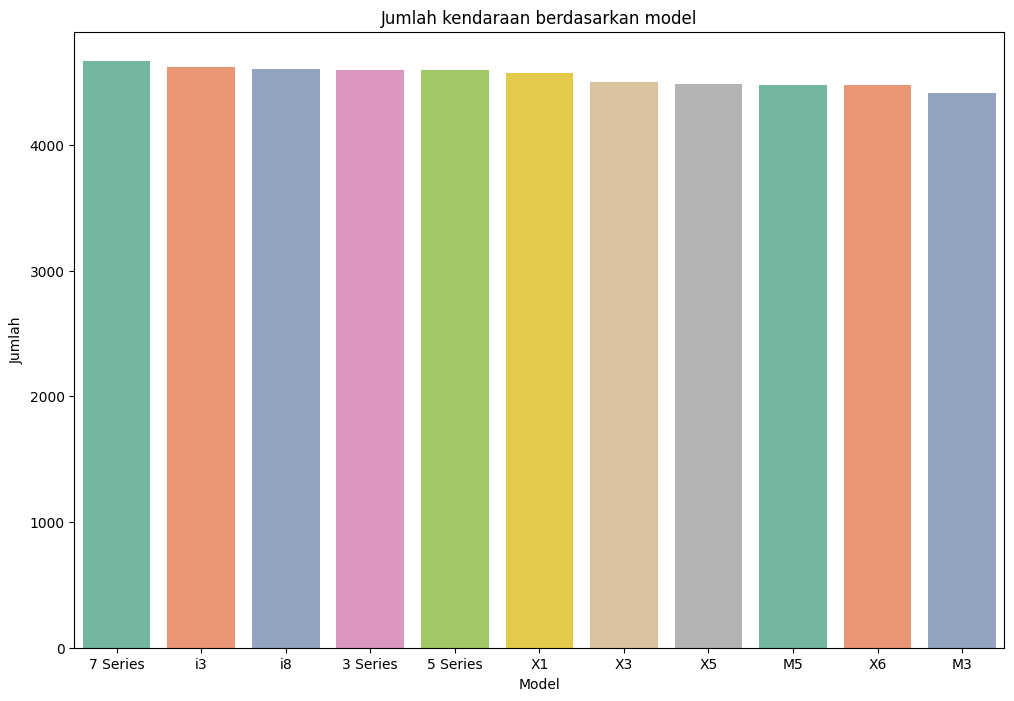

In [13]:
plt.figure(figsize=(12, 8))
sns.countplot(x=df['Model'], order=df['Model'].value_counts().index, palette='Set2')
plt.title('Jumlah kendaraan berdasarkan model')
plt.xlabel('Model')
plt.ylabel('Jumlah')
plt.show()

### Analisis Deskriptif (apa yang terjadi)

#### 1. mengetahui rata-rata harga untuk setiap model

In [14]:
def count_average_model(model):
  mr = df[df['Model'] == model]['Price_USD']
  return sum(mr)/len(mr)

In [15]:
models = df['Model'].unique()
values = [count_average_model(model) for model in models]

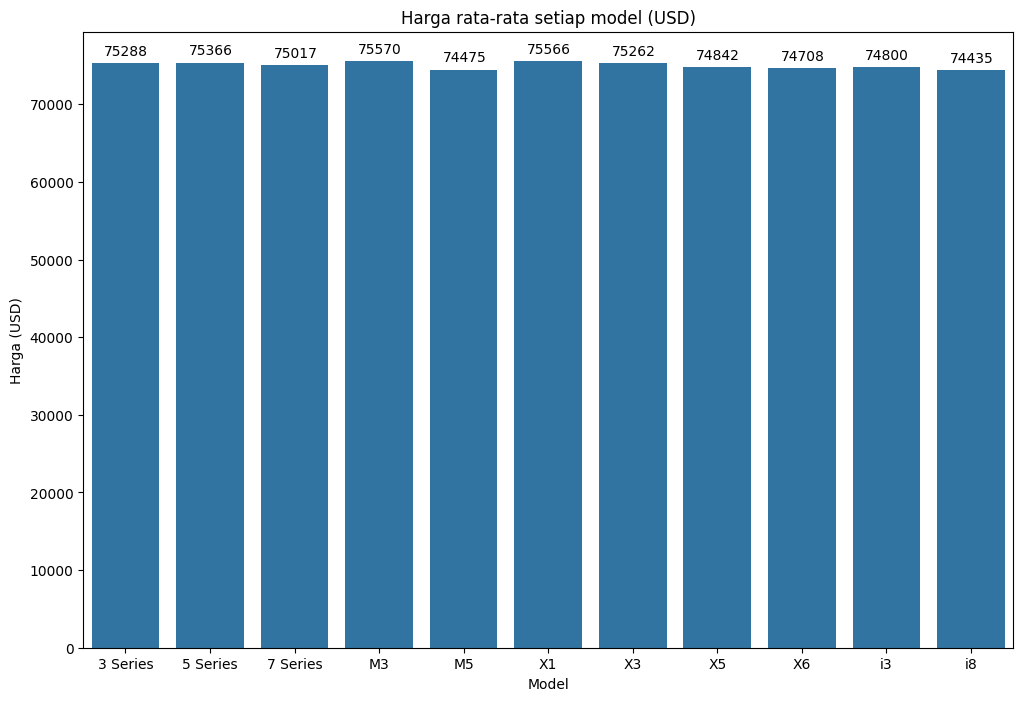

In [70]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=models, y=values)

for i, v in enumerate(values):
  ax.text(i - 0.25, v + 1000, f"{v:.0f}")

plt.title('Harga rata-rata setiap model (USD)')
plt.xlabel('Model')
plt.ylabel('Harga (USD)')
plt.show()

#### 2. Model yang diklasifikasikan high dan low

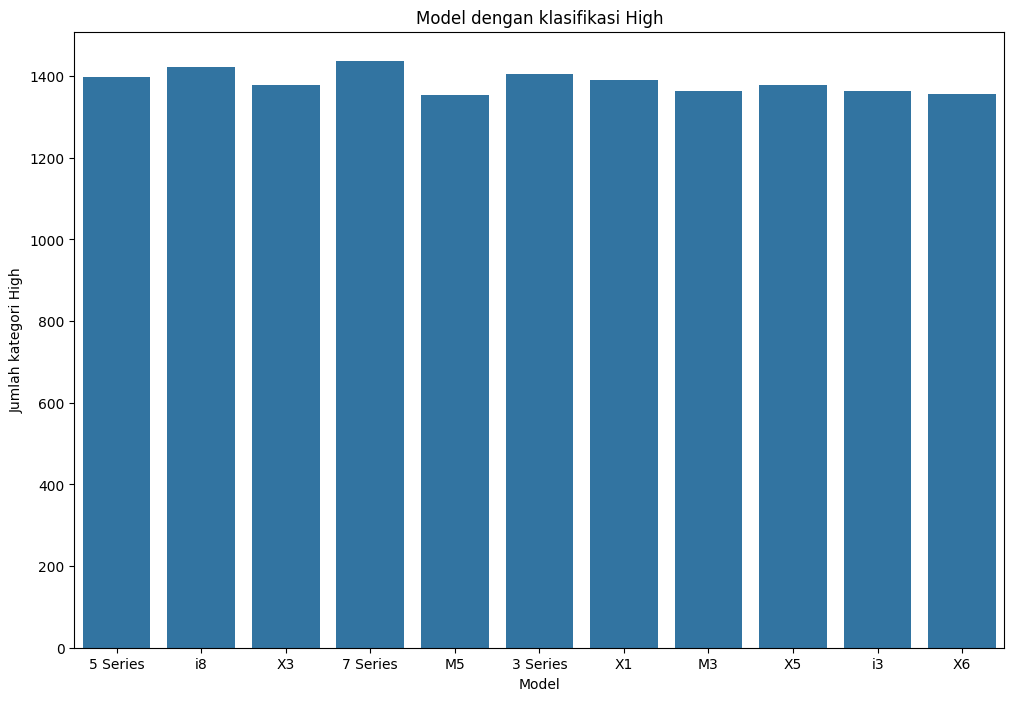

In [17]:
len_models = [len(df[(df['Model'] == model) & (df['Sales_Classification'] == 'High')]) for model in models]
plt.figure(figsize=(12, 8))
sns.barplot(x=models, y=len_models)
plt.title('Model dengan klasifikasi High')
plt.xlabel('Model')
plt.ylabel('Jumlah kategori High')
plt.show()

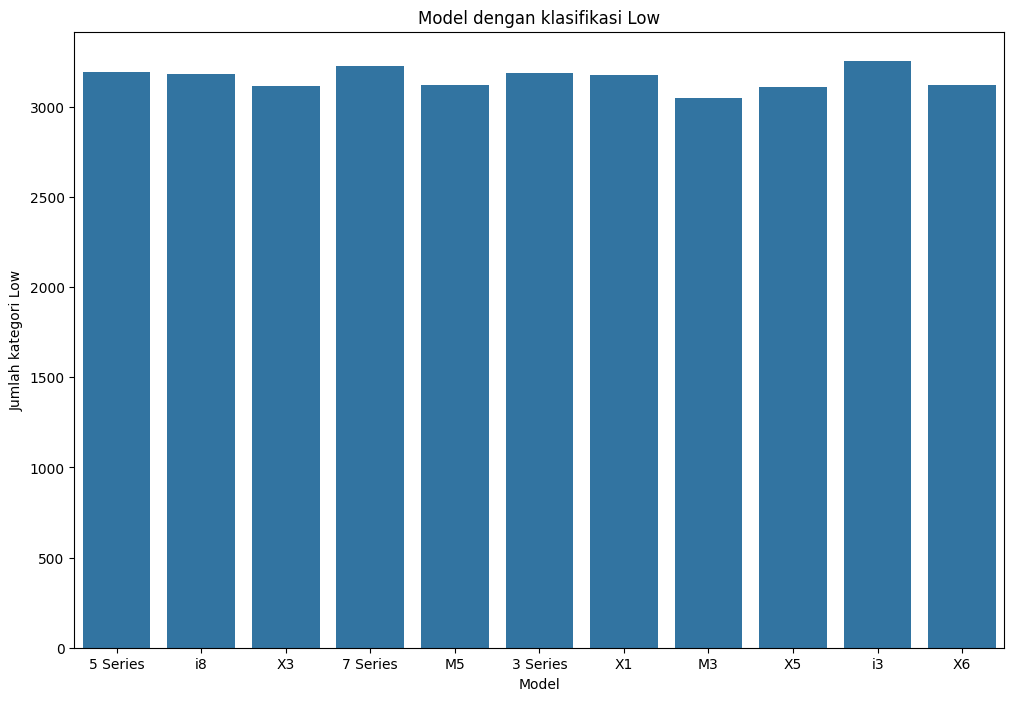

In [18]:
len_models = [len(df[(df['Model'] == model) & (df['Sales_Classification'] == 'Low')]) for model in models]
plt.figure(figsize=(12, 8))
sns.barplot(x=models, y=len_models)
plt.title('Model dengan klasifikasi Low')
plt.xlabel('Model')
plt.ylabel('Jumlah kategori Low')
plt.show()

#### 3. Persebaran Tahun model diproduksi yang dikategorikan sebagai High dan Low

/tmp/ipython-input-3054878295.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Sales_Classification'], y=df['Year'], palette='coolwarm')


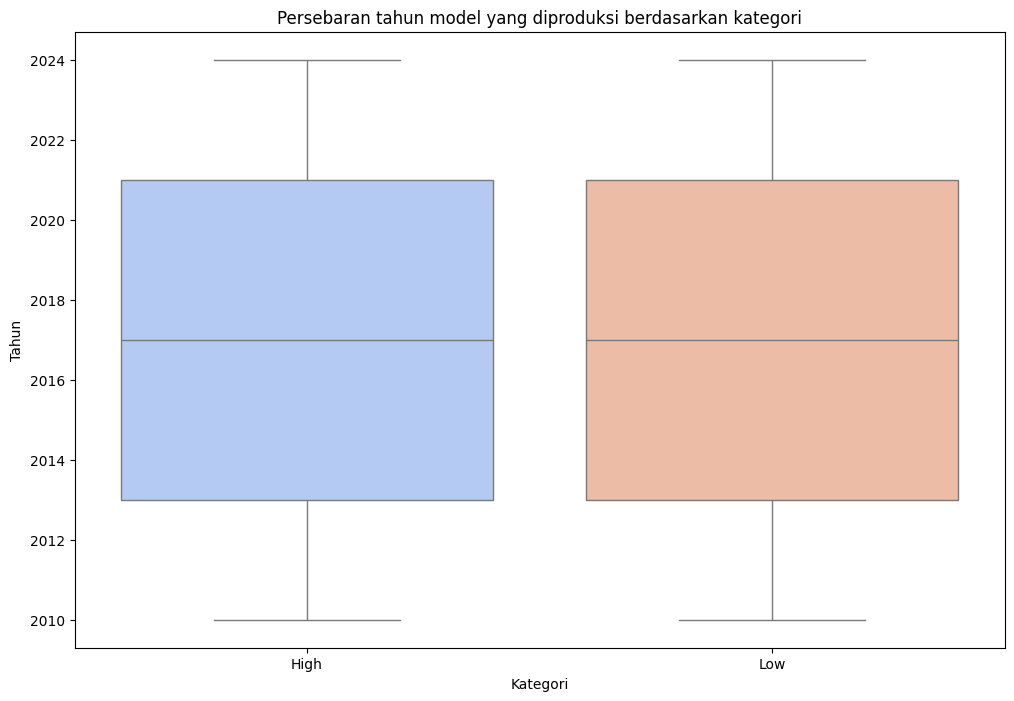

In [19]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=df['Sales_Classification'], y=df['Year'], palette='coolwarm')
plt.title('Persebaran tahun model yang diproduksi berdasarkan kategori')
plt.xlabel('Kategori')
plt.ylabel('Tahun')
plt.show()

#### 4. Jumlah Mobil Manual dan Otomatis yang tersebar di seluruh region

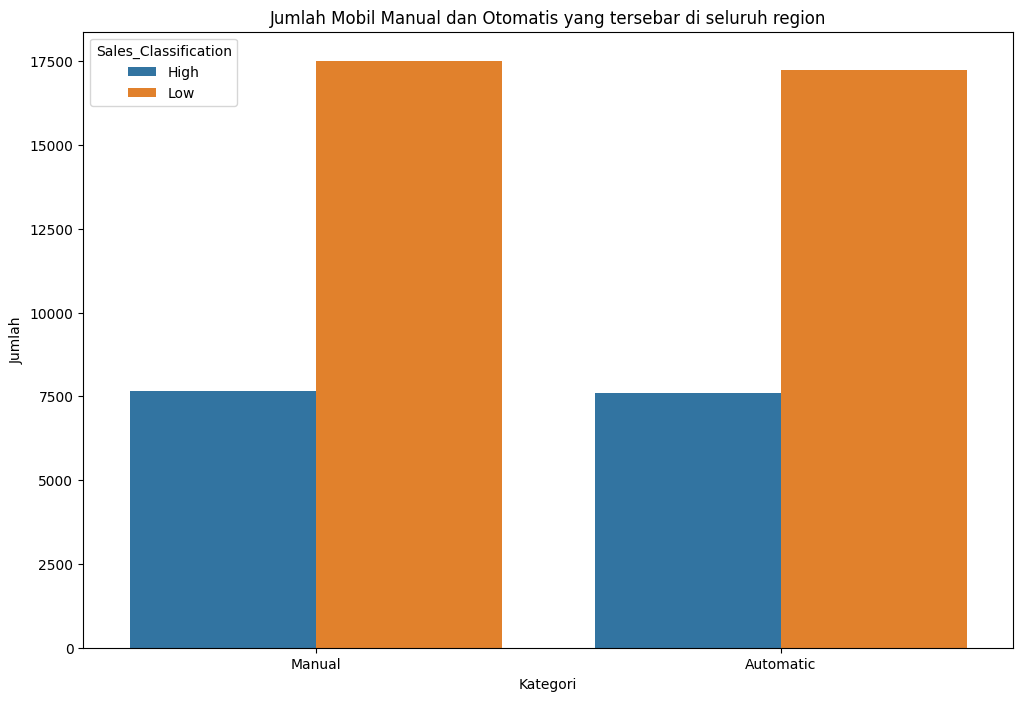

In [73]:
plt.figure(figsize=(12, 8))
sns.countplot(x=df['Transmission'], hue=df['Sales_Classification'])
plt.title('Jumlah Mobil Manual dan Otomatis yang tersebar di seluruh region')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.show()

#### 5. Warna mobil

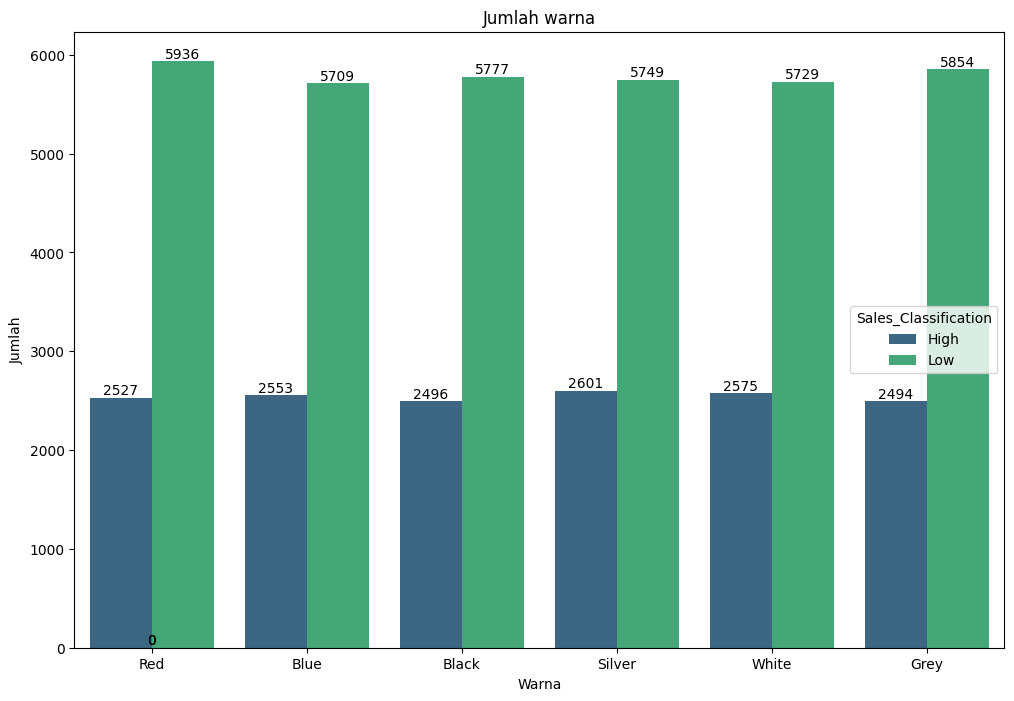

In [76]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df, x='Color', palette='viridis', hue='Sales_Classification')

for p in ax.patches:
  ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 1, int(p.get_height()), ha='center', va='bottom')

plt.title('Jumlah warna')
plt.xlabel('Warna')
plt.ylabel('Jumlah')
plt.show()

#### 6. Mencari tahu hubungan antara Transmission dengan Region

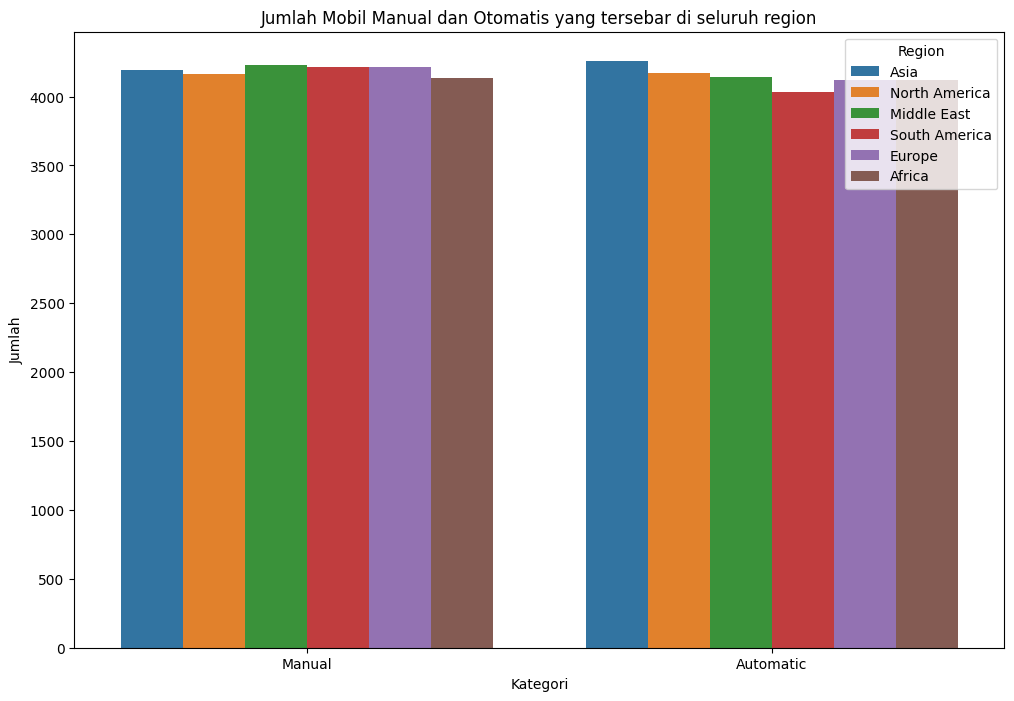

(Manual) Region Asia: 4196
(Manual) Region South America: 4218
(Manual) Region Middle East: 4228
(Manual) Region Europe: 4217
(Manual) Region North America: 4163
(Manual) Region Africa: 4132
(Automatic) Region North America: 4172
(Automatic) Region Middle East: 4145
(Automatic) Region Asia: 4258
(Automatic) Region South America: 4033
(Automatic) Region Europe: 4117
(Automatic) Region Africa: 4121


In [22]:
plt.figure(figsize=(12, 8))
sns.countplot(x=df['Transmission'], hue=df['Region'])
plt.title('Jumlah Mobil Manual dan Otomatis yang tersebar di seluruh region')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.show()

transmission = df['Transmission'].unique()

for trans in transmission:
  selected_trans = df[df['Transmission'] == trans]
  regions = selected_trans['Region'].unique()

  for region in regions:
    selected_region = selected_trans[selected_trans['Region'] == region]
    selected_count = len(selected_region['Region'])
    print(f'({trans}) Region {region}: {selected_count}')

#### 7. Mencari hubungan antara Model dan Region

/tmp/ipython-input-3461628521.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=region_high, palette='Set2')


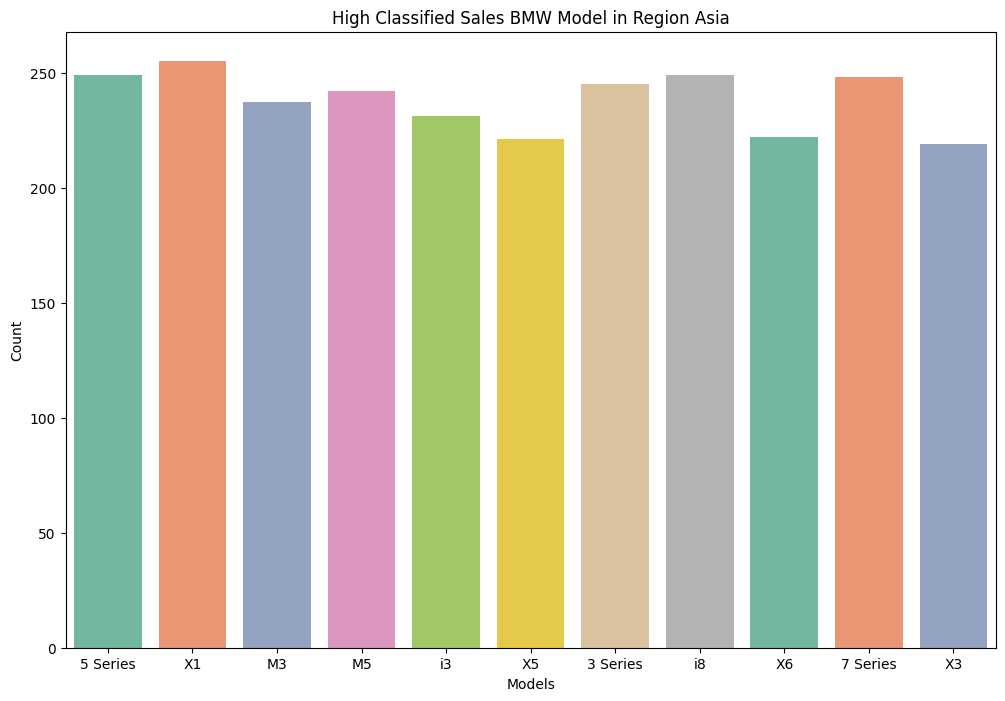

Model 5 Series: 249
Model M5: 242
Model X1: 255
Model X5: 221
Model M3: 237
Model i8: 249
Model i3: 231
Model X3: 219
Model X6: 222
Model 7 Series: 248
Model 3 Series: 245


/tmp/ipython-input-3461628521.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=region_high, palette='Set2')


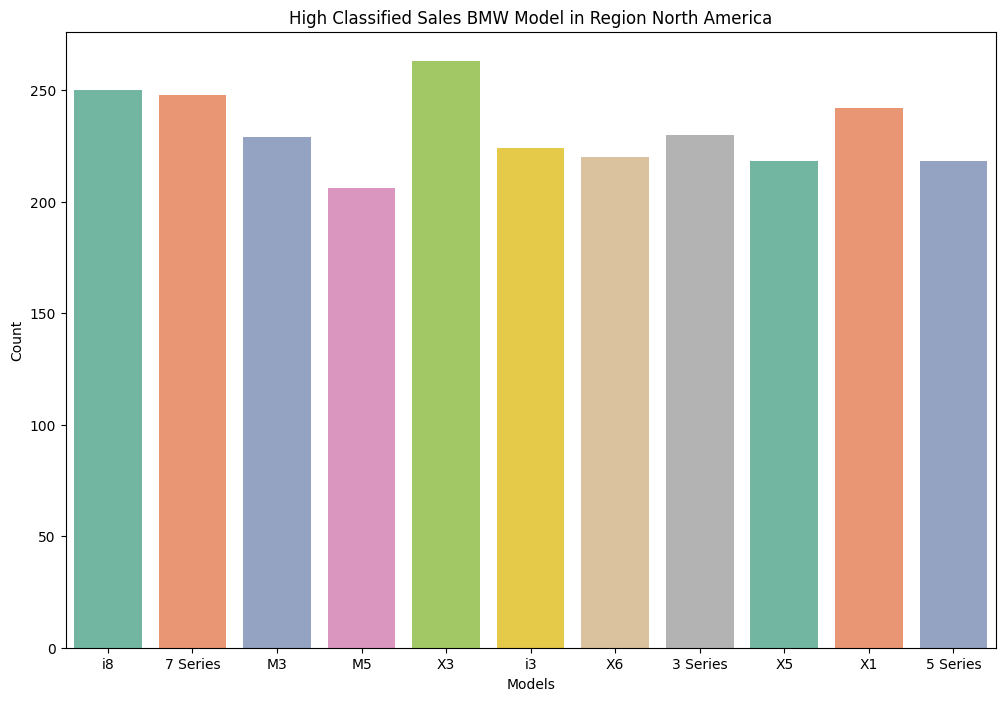

Model i8: 250
Model 5 Series: 218
Model 7 Series: 248
Model M3: 229
Model M5: 206
Model X3: 263
Model X1: 242
Model i3: 224
Model 3 Series: 230
Model X6: 220
Model X5: 218


/tmp/ipython-input-3461628521.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=region_high, palette='Set2')


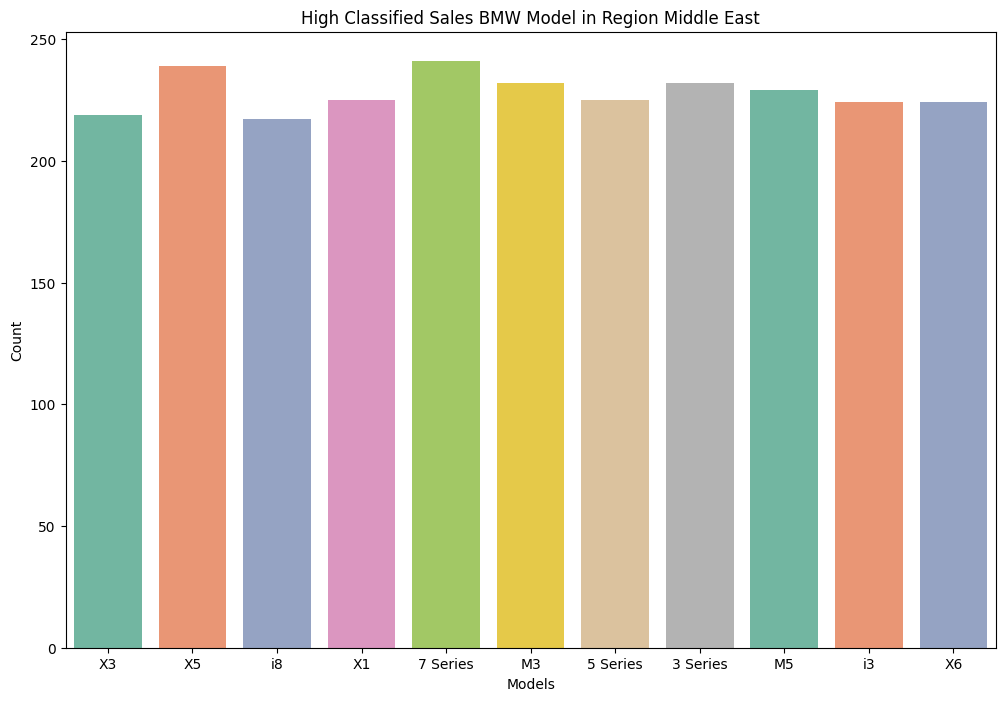

Model X3: 219
Model 5 Series: 225
Model 3 Series: 232
Model X1: 225
Model i8: 217
Model X5: 239
Model i3: 224
Model X6: 224
Model 7 Series: 241
Model M3: 232
Model M5: 229


/tmp/ipython-input-3461628521.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=region_high, palette='Set2')


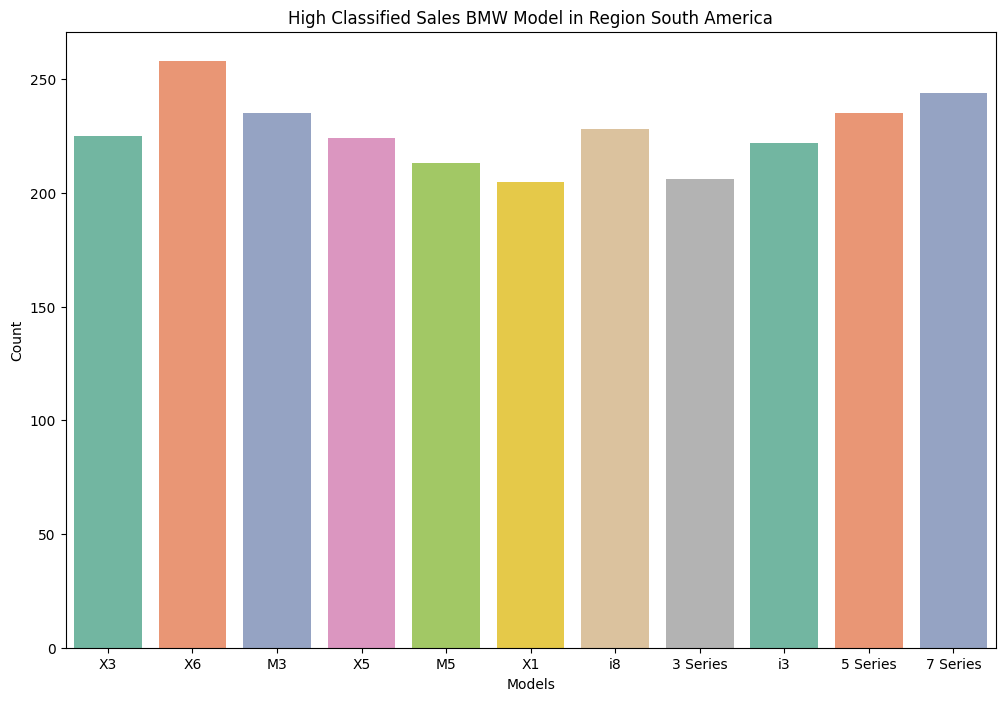

Model 7 Series: 244
Model X3: 225
Model X5: 224
Model i8: 228
Model M5: 213
Model i3: 222
Model X6: 258
Model M3: 235
Model 3 Series: 206
Model 5 Series: 235
Model X1: 205


/tmp/ipython-input-3461628521.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=region_high, palette='Set2')


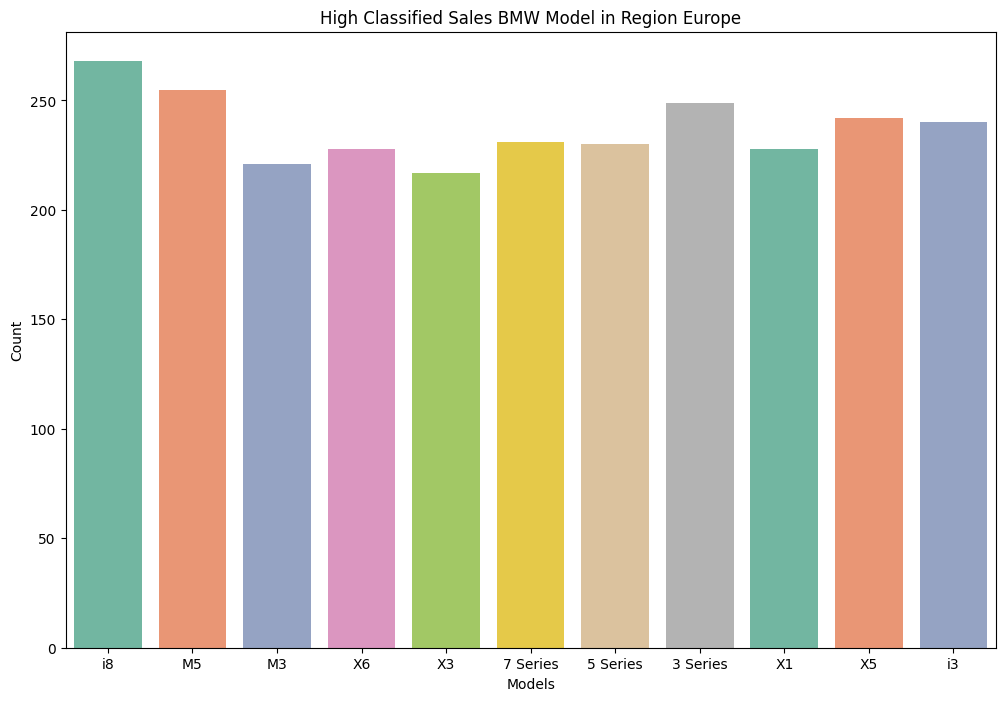

Model i8: 268
Model M5: 255
Model M3: 221
Model 3 Series: 249
Model X6: 228
Model X1: 228
Model X3: 217
Model 7 Series: 231
Model 5 Series: 230
Model X5: 242
Model i3: 240


/tmp/ipython-input-3461628521.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=region_high, palette='Set2')


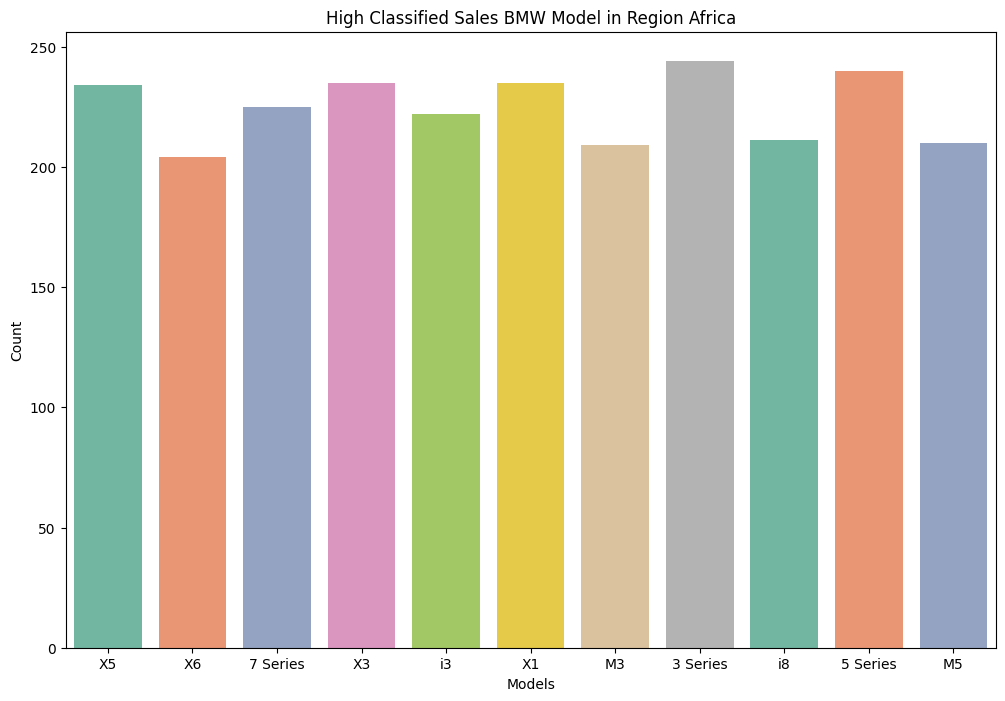

Model 5 Series: 240
Model X5: 234
Model X1: 235
Model M3: 209
Model X6: 204
Model 3 Series: 244
Model i3: 222
Model 7 Series: 225
Model X3: 235
Model M5: 210
Model i8: 211


In [23]:
regions = df['Region'].unique()

for region in regions:
  selected_region = df[df['Region'] == region]
  region_high = selected_region[selected_region['Sales_Classification'] == 'High']['Model']
  plt.figure(figsize=(12, 8))
  sns.countplot(x=region_high, palette='Set2')
  plt.title(f'High Classified Sales BMW Model in Region {region}')
  plt.xlabel('Models')
  plt.ylabel('Count')
  plt.show()

  models = selected_region['Model'].unique()

  for model in models:
    selected_model = selected_region[(selected_region['Model'] == model) & (selected_region['Sales_Classification'] == 'High')]
    selected_count = len(selected_model['Model'])
    print(f'Model {model}: {selected_count}')

Pada grafik diatas, untuk masing-masing region dapat kita lihat bahwa model yang diklasifikasikan **High** sebagai berikut:
- Asia: Model 5 Series, Model i8
- North America: Model X3
- Middle East: Model 7 Series
- South America: Model X6
- Europe: Model i8
- Africa:  Model 3 Series

#### 8. Transmission vs Sales Classification

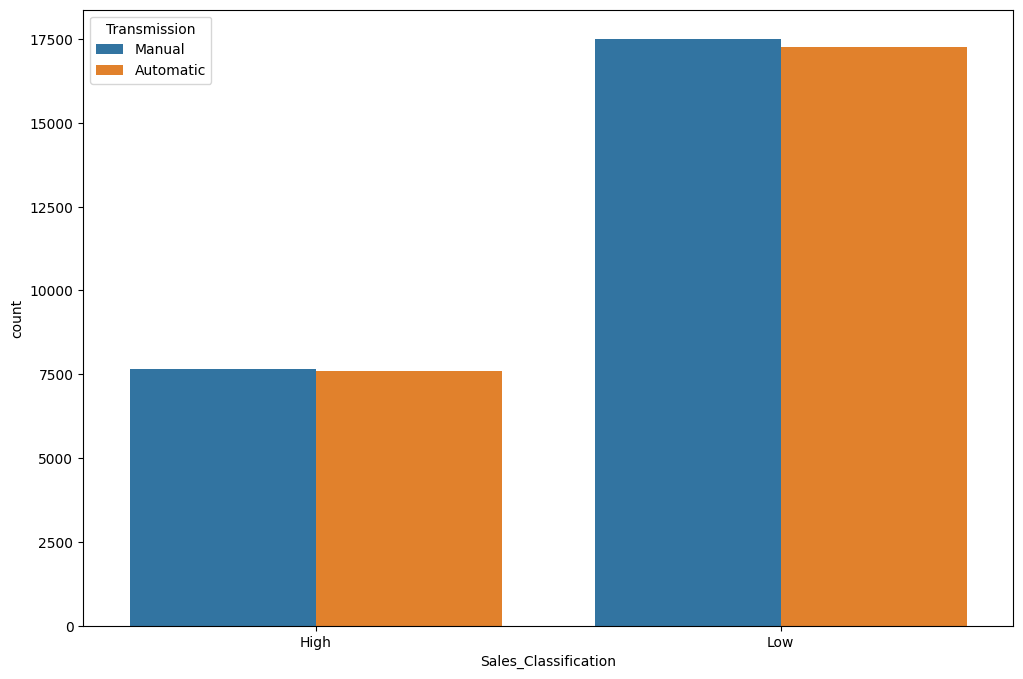

high manual: 7651
high automatic: 7595
low manual: 17503
low auto: 7595


In [24]:
# mengetahui transmisi kendaraan apakah dikategorikan high atau low
plt.figure(figsize=(12, 8))
sns.countplot(x=df['Sales_Classification'], hue=df['Transmission'])
plt.show()

high_manual = len(df[(df['Sales_Classification'] == 'High') & (df['Transmission'] == 'Manual')])
high_auto = len(df[(df['Sales_Classification'] == 'High') & (df['Transmission'] == 'Automatic')])
low_manual = len(df[(df['Sales_Classification'] == 'Low') & (df['Transmission'] == 'Manual')])
low_auto = len(df[(df['Sales_Classification'] == 'High') & (df['Transmission'] == 'Automatic')])

print(f'high manual: {high_manual}')
print(f'high automatic: {high_auto}')
print(f'low manual: {low_manual}')
print(f'low auto: {low_auto}')

#### 9. Klasifikasi penjualan vs volume penjualan


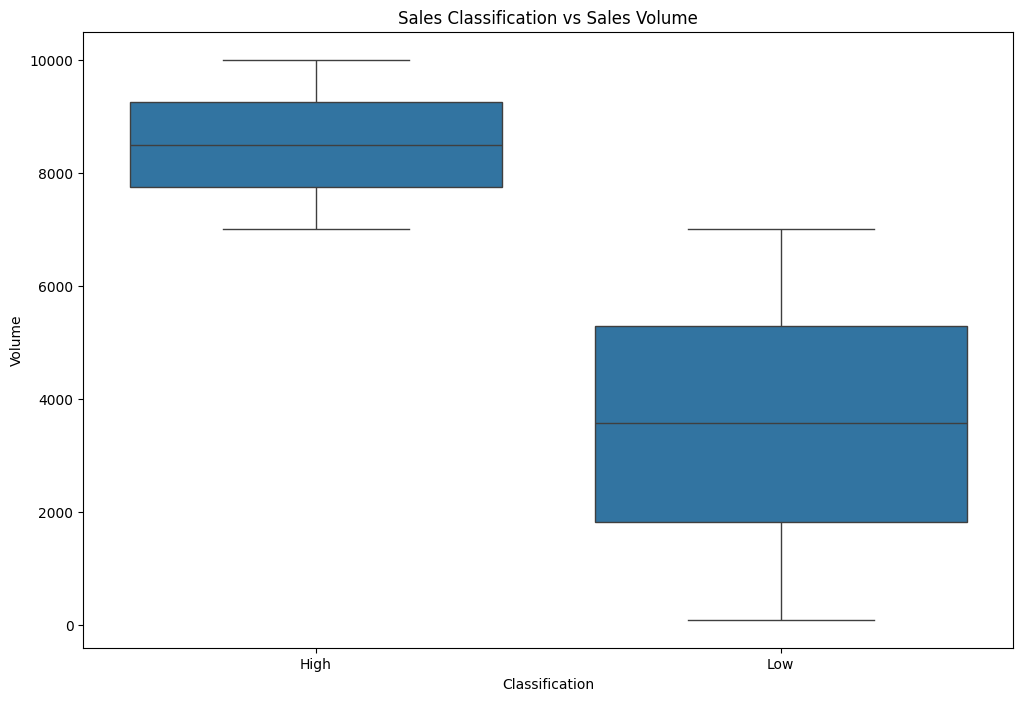

--- detail statistic for Sales Volume (High) ---
Q1 (25%): 7,742.00
Q3 (75%): 9,251.00
IQR (Q3 - Q1): 1,509.00
Lower: 5,478.50
Upper: 11,514.50
---------------------------------------------
--- detail statistic for Sales Volume (Low) ---
Q1 (25%): 1,836.00
Q3 (75%): 5,300.00
IQR (Q3 - Q1): 3,464.00
Lower: -3,360.00
Upper: 10,496.00
---------------------------------------------


In [25]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=df['Sales_Classification'], y=df['Sales_Volume'])
plt.title('Sales Classification vs Sales Volume')
plt.xlabel('Classification')
plt.ylabel('Volume')
plt.show()

sales = df['Sales_Classification'].unique()

for sale in sales:
  selected_sales = df[df['Sales_Classification'] == sale]
  q1 = selected_sales['Sales_Volume'].quantile(0.25)
  median = selected_sales['Sales_Volume'].median()
  q3 = selected_sales['Sales_Volume'].quantile(0.75)
  iqr = q3 - q1
  lower = q1 - 1.5 * iqr
  upper = q3 + 1.5 * iqr

  print(f'--- detail statistic for Sales Volume ({sale}) ---')
  print(f'Q1 (25%): {q1:,.2f}')
  print(f'Q3 (75%): {q3:,.2f}')
  print(f'IQR (Q3 - Q1): {iqr:,.2f}')
  print(f'Lower: {lower:,.2f}')
  print(f'Upper: {upper:,.2f}')
  print("---------------------------------------------")

#### 10. Fuel Type vs Region

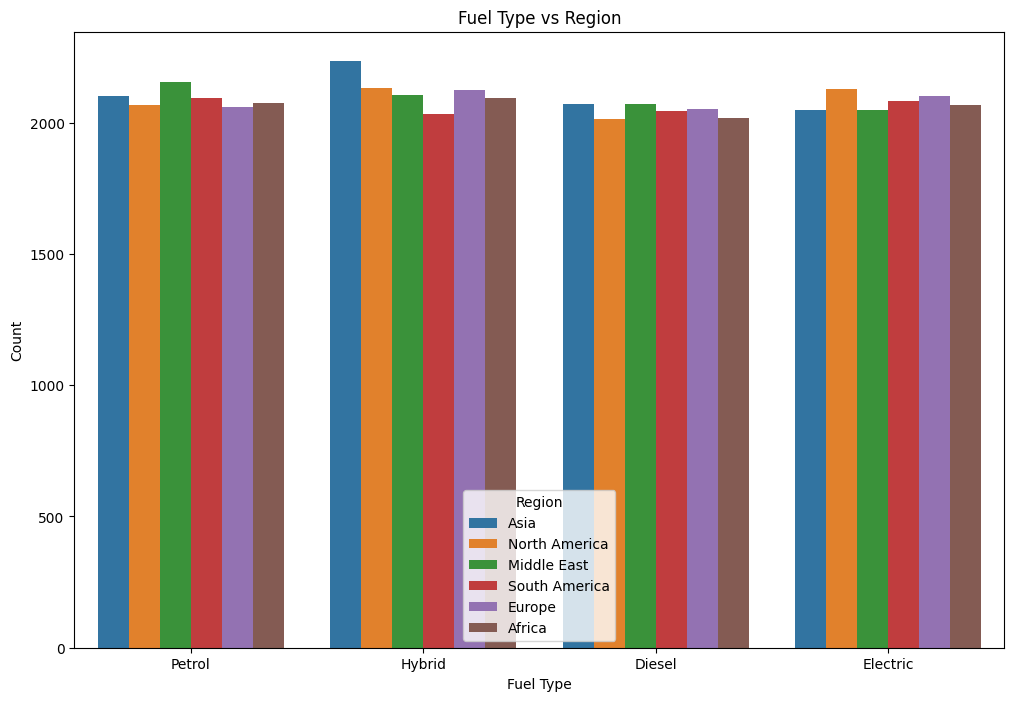

In [26]:
plt.figure(figsize=(12, 8))
sns.countplot(x=df['Fuel_Type'], hue=df['Region'])
plt.title('Fuel Type vs Region')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

#### 11. Distribusi Kelas

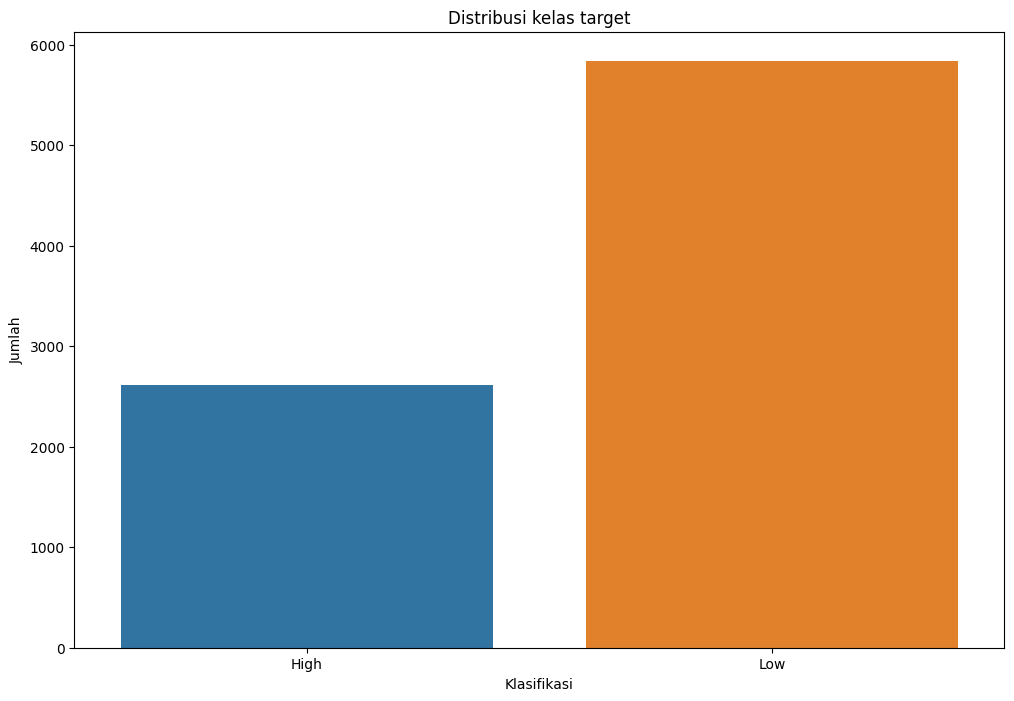

In [27]:
# menampilkan distribusi klasifikasi penjualan berdasarkan high atau low
asia_df = df[df['Region'] == 'Asia']
plt.figure(figsize=(12, 8))
sns.countplot(data=asia_df, x='Sales_Classification', hue='Sales_Classification')
plt.xlabel('Klasifikasi')
plt.ylabel('Jumlah')
plt.title('Distribusi kelas target')
plt.show()

#### 12. Sales volume vs Region

/tmp/ipython-input-959928461.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x=region_sales.index, y=region_sales.values, palette='viridis')


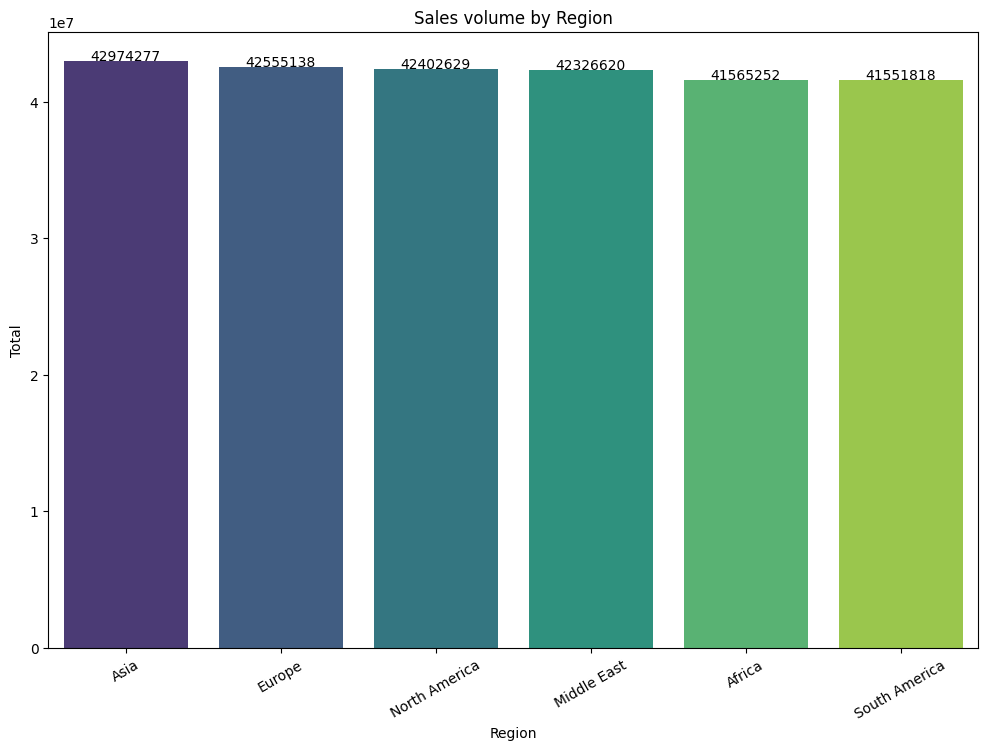

In [52]:
region_sales = df.groupby('Region')['Sales_Volume'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
ax1 = sns.barplot(x=region_sales.index, y=region_sales.values, palette='viridis')

for i, v in enumerate(region_sales.values):
  ax1.text(i, v + 50000, f"{v:.0f}", ha='center')

plt.title('Sales volume by Region')
plt.xlabel('Region')
plt.ylabel('Total')
plt.xticks(rotation=30)
plt.show()

#### 13. average of price and volume by Fuel Type

/tmp/ipython-input-2829525820.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(data=fuelS, x="Fuel_Type", y="Sales_Volume", palette='Blues_d')


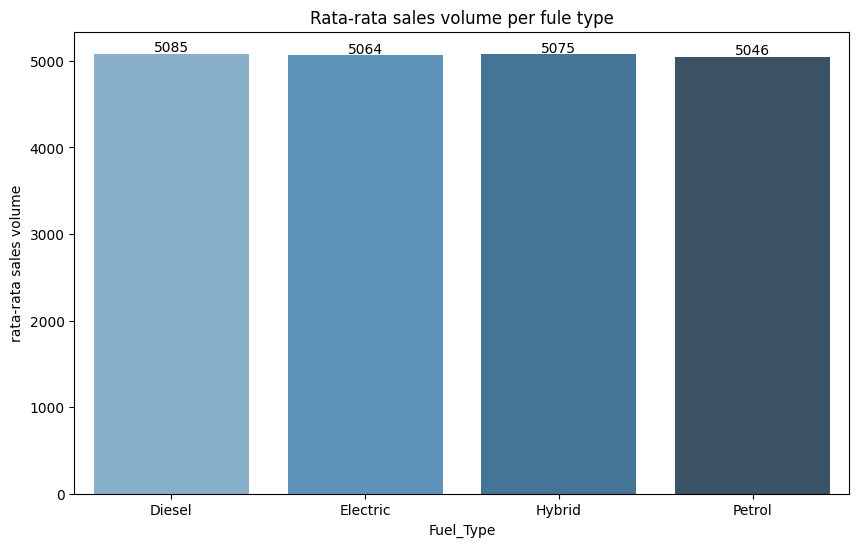

/tmp/ipython-input-2829525820.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(data=fuelS, x="Fuel_Type", y="Price_USD", palette='Greens_d')


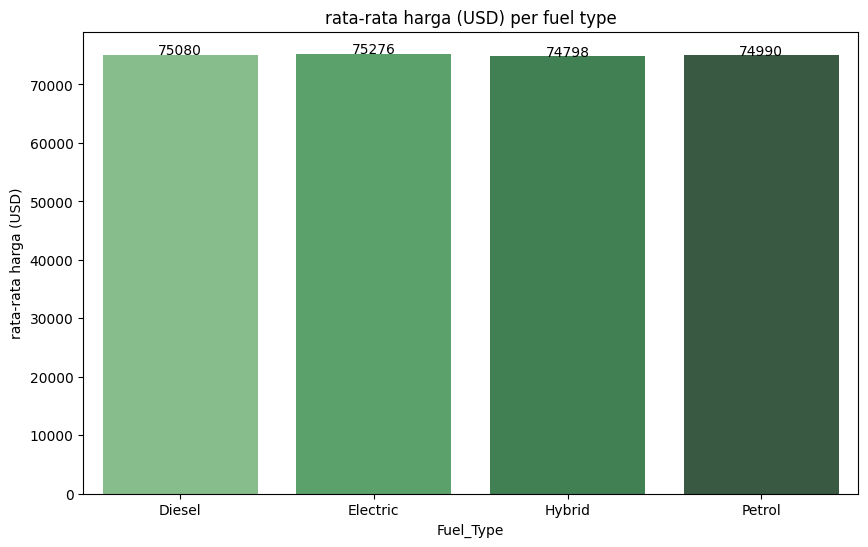

In [48]:
fuelS = df.groupby("Fuel_Type")[['Price_USD', 'Sales_Volume']].mean()

plt.figure(figsize=(10, 6))
ax1 = sns.barplot(data=fuelS, x="Fuel_Type", y="Sales_Volume", palette='Blues_d')

for i, v in enumerate(fuelS['Sales_Volume']):
  ax1.text(i, v + 30, f"{v:.0f}", ha='center', fontsize=10)

plt.title("Rata-rata sales volume per fule type")
plt.ylabel("rata-rata sales volume")
plt.show()

plt.figure(figsize=(10, 6))
ax2 = sns.barplot(data=fuelS, x="Fuel_Type", y="Price_USD", palette='Greens_d')

for i, v in enumerate(fuelS['Price_USD']):
  ax2.text(i, v + 30, f"{v:.0f}", ha='center', fontsize=10)

plt.title("rata-rata harga (USD) per fuel type")
plt.ylabel("rata-rata harga (USD)")
plt.show()

#### 14. Transmission

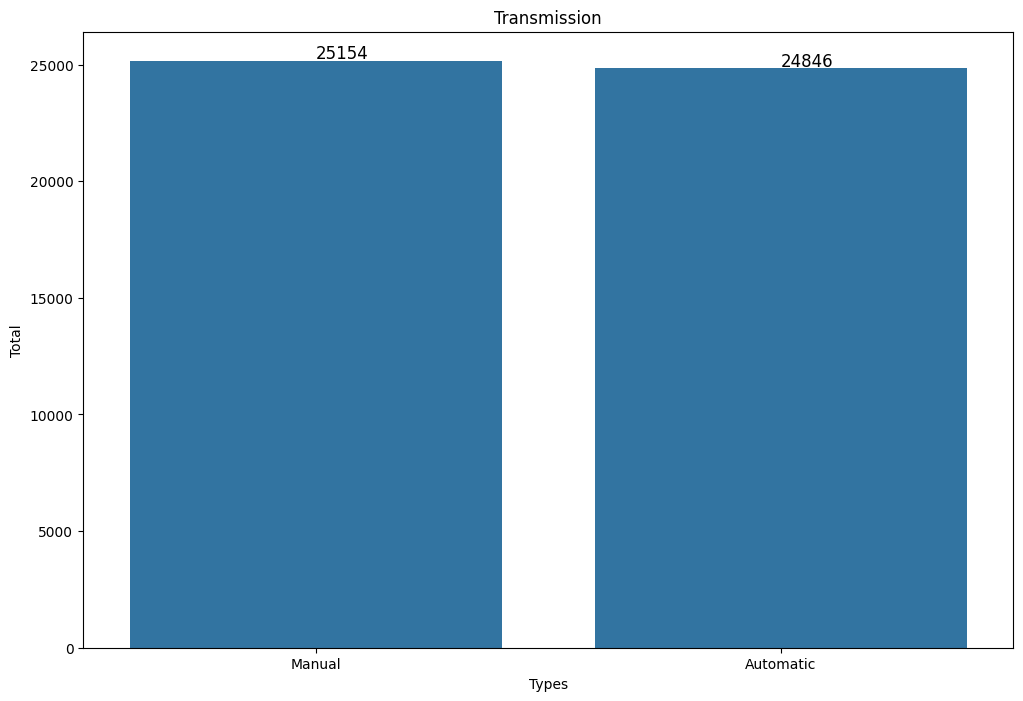

In [71]:
plt.figure(figsize=(12, 8))
ax1 = sns.countplot(data=df, x="Transmission")
manual = len(df[df['Transmission'] == 'Manual'])
auto = len(df[df['Transmission'] == 'Automatic'])

ax1.text(0, manual + 100, f"{manual:.0f}", fontsize=12)
ax1.text(1, auto + 100, f"{auto:.0f}", fontsize=12)

plt.title("Transmission")
plt.xlabel("Types")
plt.ylabel("Total")
plt.show()

### Analisis Diagnostik (mengapa ini terjadi?)

#### 1. Heatmap korelasi antar kolom

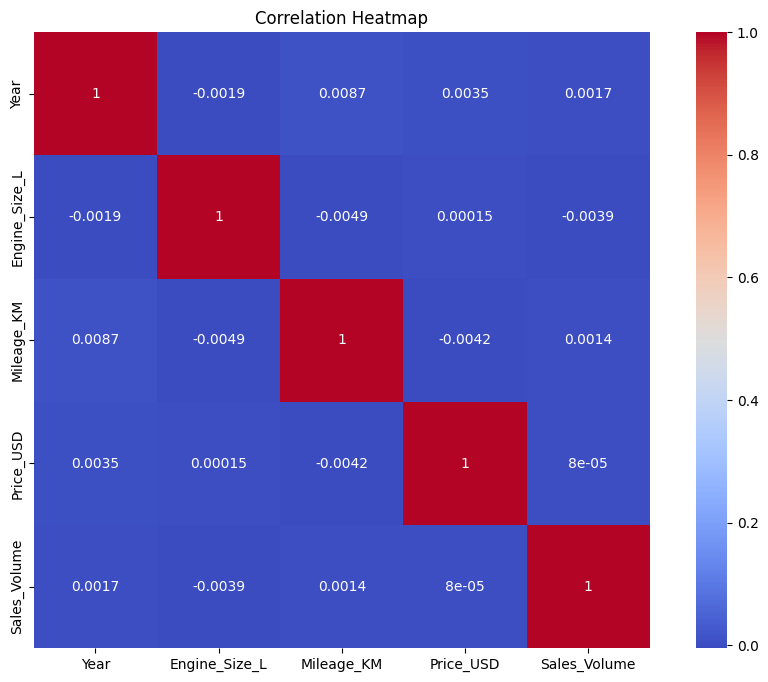

In [29]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

#### 2. rata-rata penjualan setiap tahun untuk setiap model

In [30]:
years = sorted(df['Year'].unique().tolist())
years

[2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023,
 2024]

In [31]:
for year in years:
  selected_year = df[df['Year'] == year]
  models = sorted(selected_year['Model'].unique().tolist())
  print(f'{year}')

  for model in models:
    selected_model = selected_year[selected_year['Model'] == model]
    sales_volume = sum(selected_model['Sales_Volume'])
    print(f'{model}: {sales_volume}')
  print()

2010
3 Series: 1647769
5 Series: 1501229
7 Series: 1388037
M3: 1523792
M5: 1594989
X1: 1480353
X3: 1584432
X5: 1516004
X6: 1450874
i3: 1619401
i8: 1626565

2011
3 Series: 1473102
5 Series: 1552268
7 Series: 1638828
M3: 1371503
M5: 1585291
X1: 1694495
X3: 1502405
X5: 1427955
X6: 1439191
i3: 1525849
i8: 1548054

2012
3 Series: 1378152
5 Series: 1536071
7 Series: 1528381
M3: 1391655
M5: 1344079
X1: 1671189
X3: 1643501
X5: 1500173
X6: 1397673
i3: 1752148
i8: 1608873

2013
3 Series: 1448530
5 Series: 1504123
7 Series: 1519285
M3: 1466690
M5: 1617984
X1: 1730904
X3: 1493613
X5: 1471064
X6: 1505165
i3: 1495614
i8: 1613761

2014
3 Series: 1682545
5 Series: 1491198
7 Series: 1626299
M3: 1606468
M5: 1339192
X1: 1624913
X3: 1444087
X5: 1676666
X6: 1548954
i3: 1443118
i8: 1475520

2015
3 Series: 1620499
5 Series: 1606539
7 Series: 1683339
M3: 1549374
M5: 1440389
X1: 1528027
X3: 1417693
X5: 1477242
X6: 1405983
i3: 1628045
i8: 1653077

2016
3 Series: 1712098
5 Series: 1677865
7 Series: 1466641
M3: 1

In [32]:
# Menghitung total pendatapan pertahun(revenue)
n_df = df.copy()
n_df['revenue'] = n_df.apply(lambda x: x['Price_USD'] * x['Sales_Volume'], axis=1)
# rev_per_year = n_df.groupby('Year')['revenue'].sum().reset_index()

print('--- Total Revenue per tahun ---')

year_col = []
rev_col = []

for year in years:
  selected_year = n_df[n_df['Year'] == year]
  year_col.append(year)
  rev_col.append(sum(selected_year['revenue']))

rev_year_df = pd.DataFrame({
    "Years": year_col,
    "Revenue": rev_col
})
rev_year_df.sort_values(by='Revenue')

--- Total Revenue per tahun ---


,Years,Revenue
13,2023,1224302534555
10,2020,1226552860854
8,2018,1244465589591
7,2017,1251237076544
5,2015,1255056528796
2,2012,1257840248199
3,2013,1258599026870
1,2011,1258944308614
0,2010,1261631480830
4,2014,1269989867142


### Analisis Prediktif (apa yang akan terjadi)

In [33]:
pred_df = df.copy()

In [34]:
cate_cols = ['Model', 'Region', 'Color', 'Fuel_Type', 'Transmission']
num_cols = ['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD']

In [35]:
x = pred_df.drop(['Sales_Classification'], axis=1)
y = pred_df['Sales_Classification']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cate_cols),
        ('num', 'passthrough', num_cols)
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=1))
])

model.fit(x, y)

importances = model.named_steps['classifier'].feature_importances_

encoded_cate_features = model.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(cate_cols)
all_feature_names = list(encoded_cate_features) + num_cols

importances_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

/tmp/ipython-input-1065862742.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importances_df, x='Importance', y='Feature', palette='viridis')


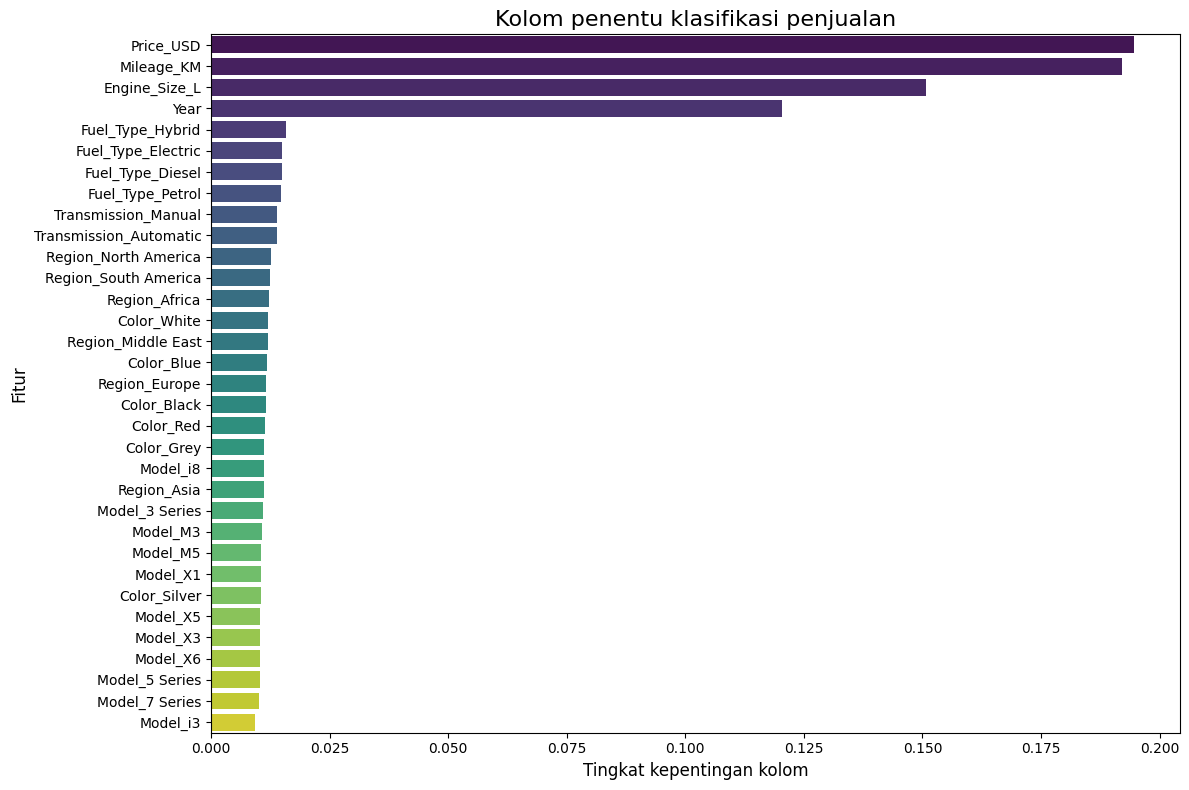

In [36]:
plt.figure(figsize=(12, 8))
sns.barplot(data=importances_df, x='Importance', y='Feature', palette='viridis')
plt.title('Kolom penentu klasifikasi penjualan', fontsize=16)
plt.xlabel('Tingkat kepentingan kolom', fontsize=12)
plt.ylabel('Fitur', fontsize=12)
plt.tight_layout()
plt.show()

In [78]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00      4544
         Low       1.00      1.00      1.00     10456

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000



# Kesimpulan

In [37]:
print()